In this notebook: 
1. I demonstrate how to take a column from a pandas dataframe (with repeated elements) and convert it into a dictionary with the frequency of each element. (using the Counter feature)
2. I then demonstrate how to turn this dictionary into a WordCloud object. 
3. Lastly, I add a picture to the WorCcloud object to give it an arbitrary shape. 

    If you are looking to learn more about how the WordCloud library, refer to the docs here. https://amueller.github.io/word_cloud/index.html

In [29]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import *
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

- For this notebook, I used a dataset from the canadian government that includes the orders and weekly prices of fruits and vegetables in several provinces. 
https://open.canada.ca/data/en/

In [30]:
#Inspect the dataframe
fruits = pd.read_csv('WeeklyWholesaleMarketPrices_PrixHebdomadaireMarcheGros.csv')
fruits.head(3)

,Date,CentreEn_CentreAn,CentreFr_CentreFr,CmdtyEn_PrdtAn,CmdtyEn_PrdtFr,VrtyEn_VrteAn,VrtyFr_VrteFr,GradeEn_CtgryAn,GradeFr_CtgryFr,Cntry_Pays,...,PkgTypeEn_EmpqtgAn,PkgTypeFr_EmpqtgFr,CntrTypeEn_TypeCntrAn,CntrTypeFr_TypeCntrFr,PkgQty_QtePqt,PkgWt_PdsPqt,UnitMsrEn_QteUnitAn,UnitMsrFr_QteUnitFr,PkgSizeEn_TaillePqtAn,PkgSizeFr_TaillePqtFr
0,2015-09-04,Wholesale-Calgary,Prix de gros-Calgary,ALFALFA SPROUTS,GERMES DE LUZERNE,UNSPECIFIED,INCONNUE,NaN,NaN,CA,...,Ctn 12X130 Gr,Ctn 12X130 Gr,Ctn,Ctn,12.0,130.0,Gr,Gr,NaN,NaN
1,2015-09-04,Wholesale-Edmonton,Prix de gros-Edmonton,ALFALFA SPROUTS,GERMES DE LUZERNE,UNSPECIFIED,INCONNUE,NaN,NaN,CA,...,Ctn 12X130 Gr,Ctn 12X130 Gr,Ctn,Ctn,12.0,130.0,Gr,Gr,NaN,NaN
2,2015-09-04,Wholesale-Vancouver,Prix de gros-Vancouver,ALFALFA SPROUTS,GERMES DE LUZERNE,UNSPECIFIED,INCONNUE,NaN,NaN,CA,...,Ctn 12X4 Oz,Ctn 12X4 Oz,Ctn,Ctn,12.0,4.0,Oz,Oz,NaN,NaN


### Pandas to Frequency Dictionary
- Now, I use the built-in python library Collections to create a dictionary with the frequency of each fruit/vegetable.
https://docs.python.org/2/library/collections.html

In [31]:
#Generate frequencies using Counter 
freqs = Counter(fruits['CmdtyEn_PrdtAn'])
df = pd.DataFrame.from_dict(freqs, orient='index').reset_index() # Convert dictionary back to a dataframe (for future use)
df.columns = ['Commodity','Frequency'] # Rename columns
print(freqs) # This is what the dictionary with frequency looks like

Counter({'APPLES': 11886, 'POTATOES': 8139, 'PEPPERS': 7923, 'ONIONS': 7711, 'LETTUCE': 7417, 'TOMATOES': 7300, 'HERBS (CULINARY)': 6847, 'CHINESE VEGETABLES': 6742, 'MUSHROOMS': 5444, 'CARROTS': 5365, 'MELONS': 5201, 'SQUASH': 4801, 'CABBAGE': 4162, 'PEARS': 4028, 'ORANGES': 3912, 'GRAPES (TABLE)': 3747, 'LEMONS': 3108, 'KALE': 2941, 'BROCCOLI': 2923, 'CUCUMBERS': 2910, 'BEETS': 2736, 'CELERY': 2585, 'BANANAS': 2542, 'CAULIFLOWER': 2334, 'LIMES': 2328, 'PEAS': 2309, 'ZUCCHINI': 2186, 'RADISHES': 2144, 'GRAPEFRUIT': 2038, 'AVOCADOS': 2020, 'STRAWBERRIES': 1960, 'SWISS CHARD': 1928, 'KIWI FRUIT': 1893, 'YAMS': 1790, 'MANGOES': 1773, 'ASPARAGUS': 1769, 'LEEKS': 1622, 'PINEAPPLES': 1574, 'SPINACH': 1557, 'SWEET POTATOES': 1455, 'RASPBERRIES': 1402, 'GARLIC': 1335, 'BEANS': 1308, 'BLUEBERRIES': 1305, 'TURNIPS': 1293, 'PLUMS': 1277, 'BLACKBERRIES': 1242, 'PAPAYA': 1230, 'PARSNIPS': 1205, 'MANDARINES': 1110, 'GINGER ROOT': 1105, 'NECTARINES': 1002, 'COCONUTS': 949, 'EGGPLANT': 927, 'NUTS': 8

 ### WordCloud
 - Now, I am going to start actually creating the WordCloud object. It starts off by opening an image with Numpy using the np.array(Image.open()) function. ( converts the image into an array of values) 

 - I then using the WordCloud () function from the WC library to add a white background to my image, maximum number of words, the thickness of the contour I want on my shape, and the colour of the contour. 
 
 - Lastly, I generate the wordcloud object with wc.generate_from_frequencies(dict) and then just plot the whole thing out !
 
 Some tips: Make sure to use large images if you have alot of words as the shape won't work properly if the image you are using is too small. Make sure you specify the entire path of your image file. 

(-0.5, 999.5, 999.5, -0.5)

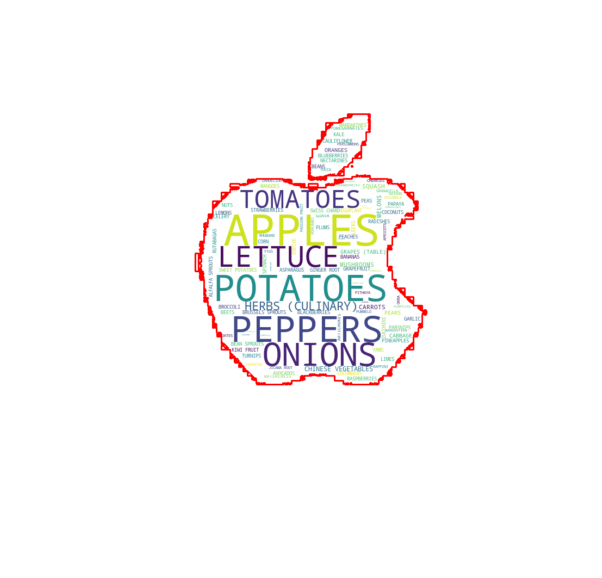

In [43]:
#Generate image
apple_mask = np.array(Image.open('/Users/nadimyounes/Desktop/apple2.jpg'))
# Generate a word cloud with freqs
wc = WordCloud(background_color="white", max_words=100, mask=apple_mask,contour_width=2,contour_color='red')
wc.generate_from_frequencies(freqs)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")